<a href="https://colab.research.google.com/github/Pratheebhak/NLP-Projects/blob/main/Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic Modeling - Wikipedia Movie Plot Dataset (Kaggle)

**Dataset:** [Wikipedia Movie Plot](https://www.kaggle.com/jrobischon/wikipedia-movie-plots)

**Contents:**

1. [Download Data](#download-data)
2. [Explore 50K Dataset](#explore-50k-dataset)
3. [Data Preprocessing](#data-preprocessing)
4. [Vectorization](#vectorization)
5. [Classification](#classification)
6. [Performance Analysis](#performance-analysis)

In [1]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 5.1MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=7e0701cde2a0220123c2c8bae68a5e5d9294e0375fee61c055ffb3c9ab82c9f7
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


## Import Packages

In [2]:
import pandas as pd
import re
import string
import collections

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models

import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import pyLDAvis
import pyLDAvis.gensim

In [3]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## Download Data 

In [4]:
data = pd.read_csv('./wiki_movie_plots_deduped.csv')

## Data Preprocessing: Understand the Data

In [5]:
data.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [6]:
print("Dataframe Length: {}".format(len(data)))
print("Dataframe Columns: {}".format(data.columns))

Dataframe Length: 34886
Dataframe Columns: Index(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki Page', 'Plot'],
      dtype='object')


In [7]:
data.describe()

,Release Year
count,34886.000000
mean,1981.314252
std,27.815174
min,1901.000000
25%,1957.000000
50%,1988.000000
75%,2007.000000
max,2017.000000


In [8]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      34886 non-null  int64 
 1   Title             34886 non-null  object
 2   Origin/Ethnicity  34886 non-null  object
 3   Director          34886 non-null  object
 4   Cast              33464 non-null  object
 5   Genre             34886 non-null  object
 6   Wiki Page         34886 non-null  object
 7   Plot              34886 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


(array([2.7622e+04, 6.9010e+03, 3.0600e+02, 3.8000e+01, 1.0000e+01,
        3.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([1.50000e+01, 3.69080e+03, 7.36660e+03, 1.10424e+04, 1.47182e+04,
        1.83940e+04, 2.20698e+04, 2.57456e+04, 2.94214e+04, 3.30972e+04,
        3.67730e+04]),
 <a list of 10 Patch objects>)

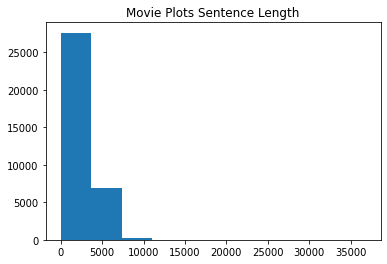

In [9]:
# Plot Sentence length (Word Count)
plt.figure()
plt.title('Movie Plots Sentence Length')
plt.hist(list(map(len, data.Plot)))

In [10]:
# Text Preprocessing
stop_words = list(STOPWORDS)
lemmatizer = WordNetLemmatizer()
def process_text(text):
    """
    Preprocessing the raw text 
    """
    # Lowercase
    text = text.lower()
    # Replace newline characters '\n' with white space
    text = text.replace('\n', ' ')
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove extra white spaces
    text = re.sub(' +', ' ', text)
    # Tokenize the string
    tokens = word_tokenize(text)
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Extract word lemmas
    lemmas = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    return lemmas

In [11]:
data['Plot'].head()

0    A bartender is working at a saloon, serving dr...
1    The moon, painted with a smiling face hangs ov...
2    The film, just over a minute long, is composed...
3    Lasting just 61 seconds and consisting of two ...
4    The earliest known adaptation of the classic f...
Name: Plot, dtype: object

In [12]:
data['Processed_Plot'] = data['Plot'].apply(process_text)

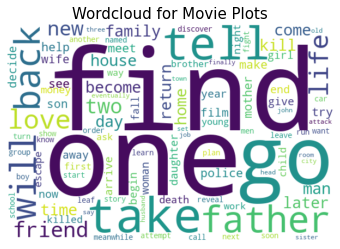

In [13]:
# Combine all words in the plot to a single string
plot_word_list = [word for word_list in data.Processed_Plot for word in word_list if word not in stop_words]
# Generate word cloud for most common words in the Plot
text = ' '.join([word for word in plot_word_list])

wordcloud_plot = WordCloud(width=600, height=400, max_words=100, stopwords=stop_words, background_color="white", collocations=False).generate(text)

plt.imshow(wordcloud_plot, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud for Movie Plots', fontsize=15)
plt.show()

Text(0.5, 0, 'Word Frequency')

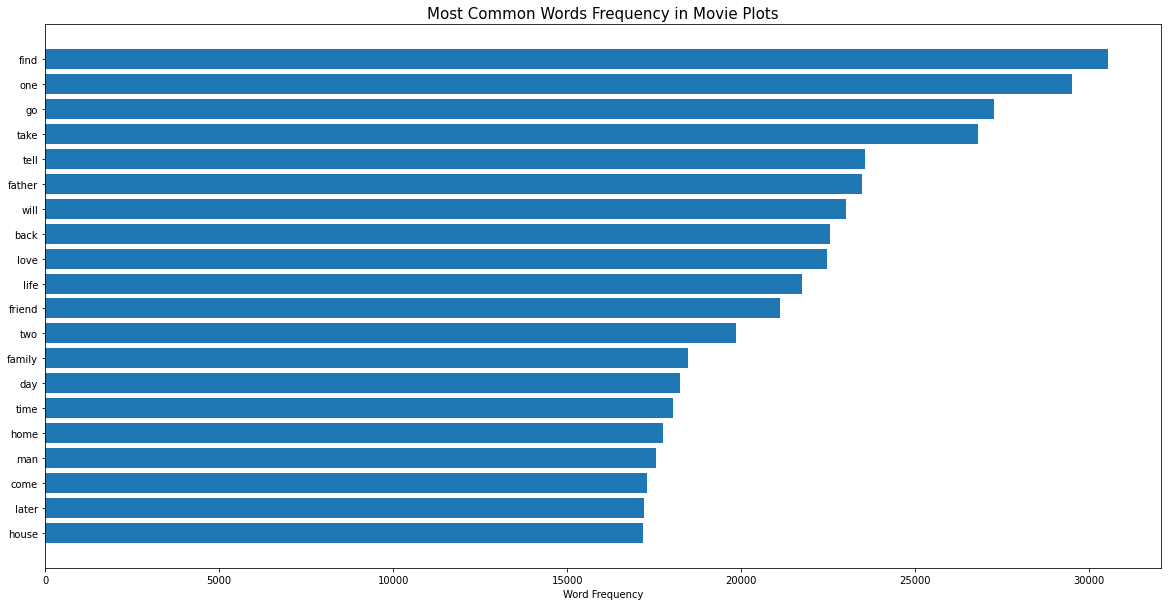

In [14]:
# Most common word frequency in Movie Plots
# Generate most commonly used words in the subject line
word_count = collections.Counter(plot_word_list).most_common(20)
words = [word[0] for word in word_count]
words_frequency = [word[1] for word in word_count]

# Plt the frequency histogram
plt.figure(figsize=(20,10))
plt.gca().invert_yaxis()
plt.title('Most Common Words Frequency in Movie Plots', fontsize=15)
plt.barh(words, words_frequency)
plt.xlabel('Word Frequency')

## Topic Modeling using Latent Dirchlet Allocation

In [15]:
# Prepare a document (corpus)
corpus_list = [plot for plot in data.Processed_Plot]
# Create a dictionary
LDA_dictionary = corpora.Dictionary(corpus_list)
# Filter extremes
LDA_dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
# Create Bag of words representation
LDA_corpus = [LDA_dictionary.doc2bow(text) for text in corpus_list]

Model Perplexity and Coherence Scores are used to assess the performance of the topic model

In [16]:
# Choosing optimal number of topics
def find_optimal_num_topics(dictionary, corpus, texts, limit, start, step):
    """
    Determine the optimal number of topics for the LDA topic model
    """
    coherence_scores = []
    model_list = []
    perplexity_scores = []
    for num_topics in range(start, limit, step):
        model = models.LdaModel(corpus=corpus,
                            id2word=dictionary,
                            num_topics=num_topics, 
                            random_state=100,
                            update_every=1,
                            passes=10,
                            alpha='auto',
                            per_word_topics=True)
        model_list.append(model)
        perplexity_scores.append(model.log_perplexity(corpus))
        coherencemodel = models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_scores.append(coherencemodel.get_coherence())

    return model_list, coherence_scores, perplexity_scores

In [17]:
model_list, coherence_score_list, perplexity_score_list = find_optimal_num_topics(dictionary=LDA_dictionary, 
                                                                                  corpus=LDA_corpus, 
                                                                                  texts=corpus_list, 
                                                                                  start=1, 
                                                                                  limit=30, 
                                                                                  step=4)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

Buffered data was truncated after reaching the output size limit.

In [18]:
print(coherence_score_list)
print(len(coherence_score_list))

[0.29400993907656187, 0.3451698845709739, 0.4002406970869143, 0.4164566912839037, 0.40693055743744266, 0.41909827537768846, 0.42806991342295186, 0.42094113496325647]
8


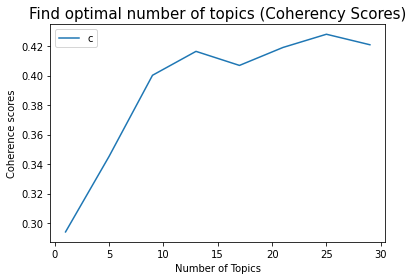

In [19]:
# Plot the optimal number of topics graph
limit=30; start=1; step=4;
x = range(start, limit, step)
plt.title('Find optimal number of topics (Coherency Scores)', fontsize=15)
plt.plot(x, coherence_score_list)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence scores")
plt.legend(("coherence_score_list"), loc='best')
plt.show()

In [20]:
# Select the optimal model - Number of topics: 13 Coherency Score: 0.42
optimal_LDA_model = model_list[3]  
# Print topics and keywords in each topic
key_list = [val for val in range(13)]
topic_data = {key: [] for key in key_list}
topic_list = optimal_LDA_model.print_topics(13, 10)
topic_words =[]
for i in range(0,len(topic_list)):
    word_list = re.sub(r'(.\....\*)|(\+ .\....\*)', '',topic_list[i][1])
    temp = [word for word in word_list.split()]
    topic_words.append(temp)
    topic_data[i].append(temp)
    print('Topic ' + str(i) + ': ' + '\t' + str(word_list))
    print('\n' + '-'*100 + '\n')

Topic 0: 	"tell" "father" "friend" "go" "mother" "day" "home" "family" "love" "find"

----------------------------------------------------------------------------------------------------

Topic 1: 	"war" "soldier" "army" "japanese" "force" "ship" "captain" "military" "attack" "order"

----------------------------------------------------------------------------------------------------

Topic 2: 	"john" "sam" "mary" "paul" "joe" "george" "surya" "mr" "money" "jimmy"

----------------------------------------------------------------------------------------------------

Topic 3: 	"school" "student" "team" "game" "babu" "win" "teacher" "friend" "rahul" "high"

----------------------------------------------------------------------------------------------------

Topic 4: 	"’" "s" "king" "krishna" "raj" "arjun" "singh" "khan" "radha" "anand"

----------------------------------------------------------------------------------------------------

Topic 5: 	"police" "kill" "find" "killed" "murder" "

In [21]:
# Visualization of the topic model
vis = pyLDAvis.gensim.prepare(topic_model=optimal_LDA_model,
                              corpus=LDA_corpus, 
                              dictionary=LDA_dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)